In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy import create_engine
from google.auth import credentials

# Set the credentials and project details
project_id = 'dsai-g3-m2-project'
credentials_path = 'path-to-credentials.json'

# Set the Google Cloud authentication environment variable
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = credentials_path

# Define the connection string
connection_string = f"bigquery://{project_id}"

# Create the engine using SQLAlchemy
engine = create_engine(connection_string)

# Connect to the BigQuery instance
with engine.connect() as connection:
    # Sample query to run against BigQuery
    query = "SELECT * FROM `brazilian_ecommerce_sales.dim_sellers` LIMIT 5000"
    result = connection.execute(query)

    data=pd.DataFrame(result)

    # Fetch the results and print them
    '''
    for row in result:
        print(row)
    '''

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   seller_id                   3095 non-null   object 
 1   seller_zip_code_prefix      3095 non-null   int64  
 2   seller_city                 3095 non-null   object 
 3   seller_state                3095 non-null   object 
 4   seller_total_order_revenue  3095 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 121.0+ KB


In [4]:
data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_total_order_revenue
0,c13ef0cfbe42f190780f621ce81f2234,1207,sao paulo sp,SP,390.00
1,5444b12c82f21c923f2639ebc722c1ea,2051,sao pauo,SP,169.90
2,1cbd32d00d01bb8087a5eb088612fd9c,3363,sp / sp,SP,1045.47
3,71593c7413973a1e160057b80d4958f6,3407,sao paulo / sao paulo,SP,299.50
4,6f1a1263039c76e68f40a8e536b1da6a,3581,sao paulop,SP,256.39


In [5]:
data.seller_id=data.seller_id.astype('string') 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   seller_id                   3095 non-null   string 
 1   seller_zip_code_prefix      3095 non-null   int64  
 2   seller_city                 3095 non-null   object 
 3   seller_state                3095 non-null   object 
 4   seller_total_order_revenue  3095 non-null   float64
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 121.0+ KB


In [7]:
data.seller_city=data.seller_city.astype('string') 

In [8]:
data.seller_state=data.seller_state.astype('string') 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   seller_id                   3095 non-null   string 
 1   seller_zip_code_prefix      3095 non-null   int64  
 2   seller_city                 3095 non-null   string 
 3   seller_state                3095 non-null   string 
 4   seller_total_order_revenue  3095 non-null   float64
dtypes: float64(1), int64(1), string(3)
memory usage: 121.0 KB


In [10]:
data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_total_order_revenue
0,c13ef0cfbe42f190780f621ce81f2234,1207,sao paulo sp,SP,390.00
1,5444b12c82f21c923f2639ebc722c1ea,2051,sao pauo,SP,169.90
2,1cbd32d00d01bb8087a5eb088612fd9c,3363,sp / sp,SP,1045.47
3,71593c7413973a1e160057b80d4958f6,3407,sao paulo / sao paulo,SP,299.50
4,6f1a1263039c76e68f40a8e536b1da6a,3581,sao paulop,SP,256.39


In [11]:
data.describe()

,seller_zip_code_prefix,seller_total_order_revenue
count,3095.000000,3095.000000
mean,32291.059451,4391.484233
std,32713.453830,13921.997192
min,1001.000000,3.500000
25%,7093.500000,208.850000
50%,14940.000000,821.480000
75%,64552.500000,3280.830000
max,99730.000000,229472.630000


In [12]:
grouped = data.groupby(['seller_city'])['seller_total_order_revenue'].sum()

In [13]:
display(grouped)

seller_city
04482255             399.90
abadia de goias      142.47
afonso claudio       293.99
aguas claras df       35.00
alambari             138.60
                     ...   
volta redonda      12954.79
votorantim         20056.34
votuporanga        21107.47
xanxere             2297.05
xaxim                360.00
Name: seller_total_order_revenue, Length: 611, dtype: float64

In [14]:
data['seller_city'] = data['seller_city'].replace('4482255' ,'rio de janeiro')

In [15]:
grouped = data.groupby(['seller_city'])['seller_total_order_revenue'].sum()

In [16]:
display(grouped)

seller_city
04482255             399.90
abadia de goias      142.47
afonso claudio       293.99
aguas claras df       35.00
alambari             138.60
                     ...   
volta redonda      12954.79
votorantim         20056.34
votuporanga        21107.47
xanxere             2297.05
xaxim                360.00
Name: seller_total_order_revenue, Length: 611, dtype: float64

In [17]:
grouped.describe()

count    6.110000e+02
mean     2.224492e+04
std      1.199028e+05
min      9.990000e+00
25%      4.080400e+02
50%      2.368800e+03
75%      1.196474e+04
max      2.702878e+06
Name: seller_total_order_revenue, dtype: float64

In [18]:
grouped.info()

<class 'pandas.core.series.Series'>
Index: 611 entries, 04482255 to xaxim
Series name: seller_total_order_revenue
Non-Null Count  Dtype  
--------------  -----  
611 non-null    float64
dtypes: float64(1)
memory usage: 25.7 KB


In [19]:
import seaborn as sns

In [20]:
grouped1 = data.groupby(['seller_state'])['seller_total_order_revenue'].sum().reset_index()

In [21]:
grouped1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   seller_state                23 non-null     string 
 1   seller_total_order_revenue  23 non-null     float64
dtypes: float64(1), string(1)
memory usage: 496.0 bytes


In [22]:
grouped1.head()

,seller_state,seller_total_order_revenue
0,AC,267.00
1,AM,1177.00
2,BA,285561.56
3,CE,20240.64
4,DF,97749.48


In [23]:
grouped1 = grouped1.sort_values(by='seller_total_order_revenue')

In [24]:
display(grouped1)

,seller_state,seller_total_order_revenue
0,AC,267.00
1,AM,1177.00
11,PA,1238.00
21,SE,1606.20
14,PI,2522.00
18,RO,4762.20
9,MS,8551.69
17,RN,9992.60
10,MT,17070.72
12,PB,17095.00


<Axes: xlabel='seller_state', ylabel='seller_total_order_revenue'>

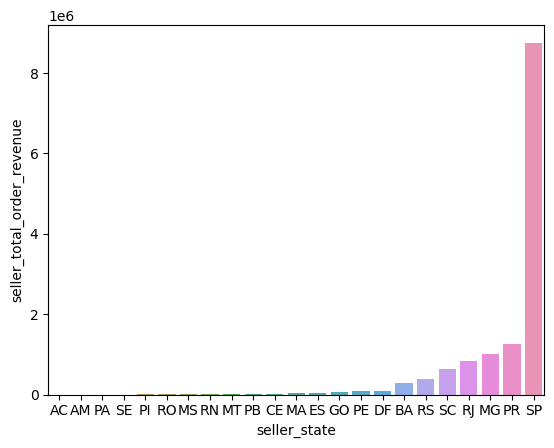

In [25]:
sns.barplot(data=grouped1, x="seller_state", y="seller_total_order_revenue")

In [26]:
grouped1['seller_total_order_revenue_%']=(grouped1['seller_total_order_revenue'])/grouped1['seller_total_order_revenue'].sum()*100

In [27]:
display(grouped1)

,seller_state,seller_total_order_revenue,seller_total_order_revenue_%
0,AC,267.00,0.001964
1,AM,1177.00,0.008660
11,PA,1238.00,0.009109
21,SE,1606.20,0.011818
14,PI,2522.00,0.018556
18,RO,4762.20,0.035038
9,MS,8551.69,0.062919
17,RN,9992.60,0.073520
10,MT,17070.72,0.125597
12,PB,17095.00,0.125776


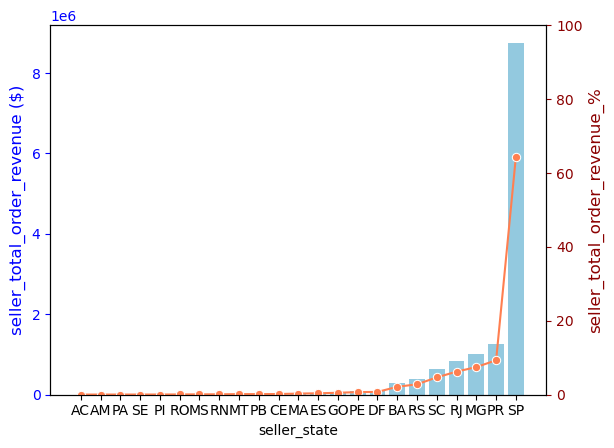

In [28]:
# Create figure and primary y-axis
fig, ax1 = plt.subplots()

# Create barplot for revenue
sns.barplot(x='seller_state', y='seller_total_order_revenue', data=grouped1, ax=ax1, color='skyblue')
ax1.set_ylabel('seller_total_order_revenue ($)', fontsize=12, color='blue')

# Create secondary y-axis
ax2 = ax1.twinx()

# Create lineplot for new subscribers
sns.lineplot(x='seller_state', y='seller_total_order_revenue_%', data=grouped1, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('seller_total_order_revenue_%', fontsize=12, color='darkred')

# Adjust the scale of the secondary y-axis
ax2.set_ylim(0, 100)

# Change axis and tick colors to match the data plots
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('darkred')
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='darkred')

# Display the plot
plt.show()

In [29]:
pip install sqlalchemy pybigquery google-auth

Note: you may need to restart the kernel to use updated packages.
